In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification


In [13]:
import sys
sys.path.append('..\..') #works on windows

In [15]:
from supervised_learning.knn import KNN

In [16]:
def plot_decision_regions(X, y, classifier=None, resolution=0.02):
    """ Taken from Rashka's book """
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    x2_min, x2_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    if classifier is not None:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black'
        )

In [18]:
plt.rc('font', family='serif')
%matplotlib inline

<ipython-input-16-150355565b50>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


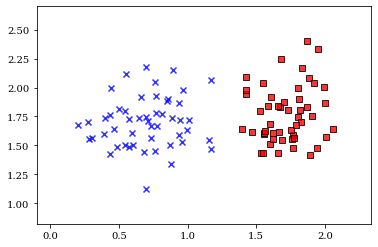

In [19]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1,
                           scale=0.5, shift=2)

rng = np.random.RandomState(42)
X += 0.5 * rng.uniform(size=X.shape)
plot_decision_regions(X, y)

In [20]:
knn = KNN()
knn.fit(X, y)

<ipython-input-16-150355565b50>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


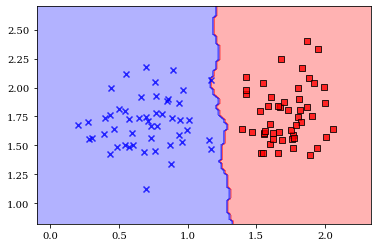

In [21]:
plot_decision_regions(X, y, classifier=knn)